<a href="https://colab.research.google.com/github/marciorvneto/ml-course/blob/main/univariate-linear-regression/Univariate_Linear_Regression_Apartment_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's implement linear regression

### It's time to actually do some supervised learning!

In our last lecture, we posed a problem, where you'd be interested in predicting apartment prices $y$, based on their area $x$.

We chose **linear regression** as our model, and even derived equations for finding its parameters $a$ and $b$.

We're now going to go through all the steps required to **train** your model, and **assess** its performance.

## First things first

We begin by **importing** an extremely useful Python library called `numpy`. It provides us with many useful functions that we'll need for implementing our models.

To invoke this library into our project, we use the following command:

In [3]:
import numpy as np

This command accomplishes two things:
* It imports `numpy` into our project, and
* Allows us to refer to `numpy` using the alias `np`

Let us now import our dataset.

## Importing our data

The first step is to bring the apartment price data that we've collected into our project.

We'll do that with the help of another extremely useful library called `pandas`. It provides us with many useful functions for working with datasets. We import it using the following command:

In [2]:
import pandas as pd

Our apartment data has been stored in the *Comma-Separated Values* format, or CSV. If you're curious, you can learn more about CSV files here: https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/

We are going to use the `pandas` library to read our data into a `dataframe`, which is a convenient (and fast!) way of storing and manipulating it.

In [5]:
dataset = pd.read_csv("https://raw.githubusercontent.com/marciorvneto/ml-course/main/univariate-linear-regression/apartment_data.csv")

`pandas` gives us a nice visualization of our data:

In [6]:
dataset

,0,1
0,545.645646,329.298859
1,713.113113,346.389176
2,101.401401,140.916936
3,104.904905,191.111323
4,162.362362,188.744014
...,...,...
995,760.060060,351.869124
996,402.002002,202.393584
997,761.461461,264.727066
998,685.785786,273.096024


In [ ]:

N = 1000
x = np.linspace(100, 800, N)
e = np.random.randn(N) * 50
y = 0.3 * x + 120 + e 

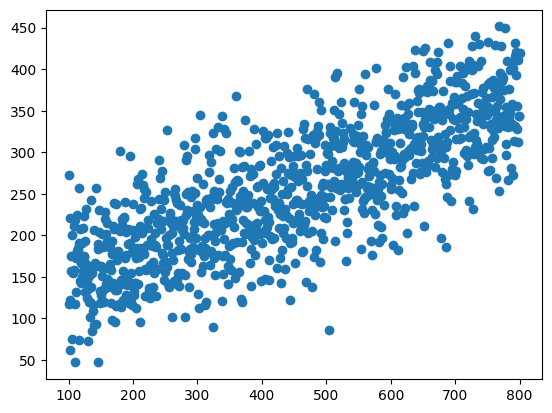

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,y, 'o')

In [ ]:
percent_train = 0.7

indices = np.arange(N)
np.random.shuffle(indices)

N_train = int(N * percent_train)
N_test = N - N_train

training_indices = indices[:N_train]
test_indices = indices[N_train:]

print(training_indices)
print(test_indices)

[865 328 269 100 977 975 411 714 778  18 176  54 298  44 696 416 678 773
 705 889 610 503 236 712 139 948  55 247 472 103 742  12 458 822 730 971
 692 994  52 594 440 428 250 640 963 962 649 570 979 911 740 297 700 548
 899 119 581 173 274 905  69 270 361 965 267  73 651 858 379 302 381 151
 945  33 490 489 645 728 995 783 326  24 967 222 370 500 766 784 775  17
 229 182 308 104 541 934 284 434 653 330 943  61 195 403 573 483 935  76
  34 184 171  14 949 122 681 271 721  50 521 169 128 997 189 242 748 671
 533 456 771 225 231 871 782 650 913 562 791 845 431 331 829 254 909  60
 699 755 390 321 557 426 811 377 397 168 199 525 289 356 243 580 702 516
 465 818 286  20  75 129 941 980 675 409 316 559 386 198 564 768 680  97
 787 682 993 339 926 613 800 619  56 383 415  93 334 421 595 598 688 285
 959 808 686 161 534 835 919  83  15 240 460 344 872 938 543  65 928 600
 836 325 776 698 432  11  19  91 710  23 593 412 263 847 430 842 827 893
 986 116  64  95 641 126 188 275 615 703 623   8 30

In [ ]:
x_train, y_train = x[training_indices], y[training_indices]
x_test, y_test = x[test_indices], y[test_indices]

In [ ]:
Sx = np.sum(x_train)
Sy = np.sum(y_train)
Sxy = np.sum(x_train*y_train)
Sx2 = np.sum(x_train**2)

In [ ]:
a_hat = (N * Sxy - Sx*Sy)/(N * Sx2 - Sx ** 2)
b_hat = (Sx2 * Sy - Sxy*Sx)/(N * Sx2 - Sx ** 2)
print(a_hat, b_hat)

0.46249487468672384 34.6348987638584


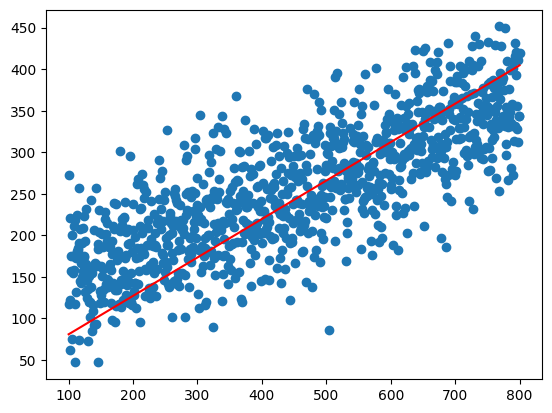

In [ ]:
plt.plot(x,y, 'o')
plt.plot(x, a_hat * x + b_hat, 'r')

In [ ]:
def mse(x, y, is_training):
  if is_training:
    N = N_train
  else:
    N = N_test
  y_hat = a_hat * x + b_hat
  return 1/N * np.sum((y_hat - y)**2)

In [ ]:
training_error = mse(x_train, y_train, True)
test_error = mse(x_test, y_test, False)

print(training_error, test_error)

3534.9516623542445 3800.8655115098836
